# Data Quality Check and EDA for US Retail Dataset

## Load Data
The dataset is loaded for further analysis and processing.

In [ ]:

import pandas as pd

# Load the dataset
file_path = 'US_Retail_Data_Quality.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Transaction_ID,Customer_ID,Product_ID,Store_ID,Quantity,Price_per_unit,Discount,Transaction_Date,Payment_Method,Customer_Age,Customer_Gender,State,ZIP_Code,Product_Category,Loyalty_Card_Status,Review_Rating
0,TID000001,CUST9999,PROD426,STORE29,2.0,176.35,15.0,2022-12-12,Cash,67.0,NaN,California,73301.0,NaN,Active,NaN
1,TID000002,CUST9999,PROD840,STORE32,4.0,136.07,20.0,2023-10-28,NaN,28.0,Female,California,10001.0,Furniture,Active,4.0
2,TID000003,CUST9999,PROD571,STORE34,5.0,402.34,NaN,2022-03-13,Debit Card,NaN,Female,Florida,73301.0,Furniture,Active,1.0
3,TID000004,CUST9999,PROD226,STORE11,5.0,324.90,NaN,2022-05-13,Cash,36.0,Female,Texas,10001.0,Groceries,Inactive,2.0
4,TID000005,CUST9999,PROD686,STORE62,2.0,132.55,NaN,2022-11-25,NaN,NaN,Male,California,10001.0,Clothing,NaN,NaN


## Data Quality Check
This section checks for missing values, duplicates, and invalid data.

In [ ]:

# Missing Values Check
missing_values = df.isnull().sum()

# Duplicate Rows Check
duplicate_rows = df[df.duplicated()]

# Invalid Data Checks (Example: Negative or Zero Values in Quantity)
invalid_quantity = df[df['Quantity'] <= 0]

# Display results
print("Missing Values:")
print(missing_values)
print("\nNumber of Duplicate Rows:", len(duplicate_rows))
print("\nInvalid Quantity Entries:")
print(invalid_quantity)


Missing Values:
Transaction_ID             0
Customer_ID                0
Product_ID                 0
Store_ID                   0
Quantity                3950
Price_per_unit             0
Discount                3854
Transaction_Date           0
Payment_Method          4666
Customer_Age           11665
Customer_Gender         7885
State                   4734
ZIP_Code                4722
Product_Category        4713
Loyalty_Card_Status     5901
Review_Rating           3872
dtype: int64

Number of Duplicate Rows: 0

Invalid Quantity Entries:
Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Product_ID, Store_ID, Quantity, Price_per_unit, Discount, Transaction_Date, Payment_Method, Customer_Age, Customer_Gender, State, ZIP_Code, Product_Category, Loyalty_Card_Status, Review_Rating]
Index: []


## Data Correction
This section resolves issues like missing values, duplicates, and invalid data.

In [ ]:

# Drop Duplicates
df = df.drop_duplicates()

# Fill Missing Values
df['Quantity'].fillna(1, inplace=True)
df['Discount'].fillna(0, inplace=True)
df['Payment_Method'].fillna('Unknown', inplace=True)
df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
df['Customer_Gender'].fillna('Unknown', inplace=True)
df['State'].fillna('Unknown', inplace=True)
df['ZIP_Code'].fillna('00000', inplace=True)
df['Product_Category'].fillna('Miscellaneous', inplace=True)
df['Loyalty_Card_Status'].fillna('Unknown', inplace=True)
df['Review_Rating'].fillna(df['Review_Rating'].mean(), inplace=True)

# Replace invalid Quantity values
df['Quantity'] = df['Quantity'].apply(lambda x: 1 if x <= 0 else x)

# Display the corrected dataset
df.head()


<ipython-input-3-594f2c77c9e1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(1, inplace=True)
<ipython-input-3-594f2c77c9e1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

,Transaction_ID,Customer_ID,Product_ID,Store_ID,Quantity,Price_per_unit,Discount,Transaction_Date,Payment_Method,Customer_Age,Customer_Gender,State,ZIP_Code,Product_Category,Loyalty_Card_Status,Review_Rating
0,TID000001,CUST9999,PROD426,STORE29,2.0,176.35,15.0,2022-12-12,Cash,67.0,Unknown,California,73301.0,Miscellaneous,Active,3.003319
1,TID000002,CUST9999,PROD840,STORE32,4.0,136.07,20.0,2023-10-28,Unknown,28.0,Female,California,10001.0,Furniture,Active,4.000000
2,TID000003,CUST9999,PROD571,STORE34,5.0,402.34,0.0,2022-03-13,Debit Card,44.0,Female,Florida,73301.0,Furniture,Active,1.000000
3,TID000004,CUST9999,PROD226,STORE11,5.0,324.90,0.0,2022-05-13,Cash,36.0,Female,Texas,10001.0,Groceries,Inactive,2.000000
4,TID000005,CUST9999,PROD686,STORE62,2.0,132.55,0.0,2022-11-25,Unknown,44.0,Male,California,10001.0,Clothing,Unknown,3.003319


## Exploratory Data Analysis (EDA)
This section includes statistical summaries and visualizations.

In [ ]:

# Statistical Summary
summary = df.describe()
print(summary)


           Quantity  Price_per_unit      Discount  Customer_Age  Review_Rating
count  23456.000000    23456.000000  23456.000000  23456.000000   23456.000000
mean       2.660726      251.691588      8.310880     43.952891       3.003319
std        1.493424      142.205425      7.452906     10.843746       1.302062
min        1.000000        5.000000      0.000000     18.000000       1.000000
25%        1.000000      128.505000      0.000000     44.000000       2.000000
50%        2.000000      251.600000      5.000000     44.000000       3.003319
75%        4.000000      373.792500     15.000000     44.000000       4.000000
max        5.000000      500.000000     20.000000     70.000000       5.000000


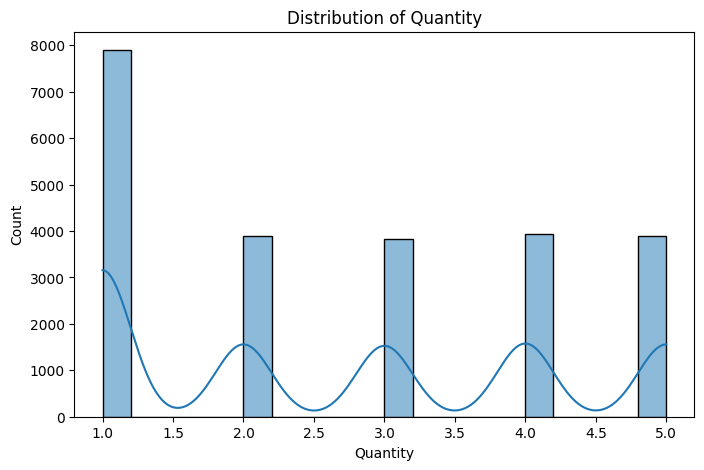

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Quantity
plt.figure(figsize=(8, 5))
sns.histplot(df['Quantity'], bins=20, kde=True)
plt.title('Distribution of Quantity')
plt.show()


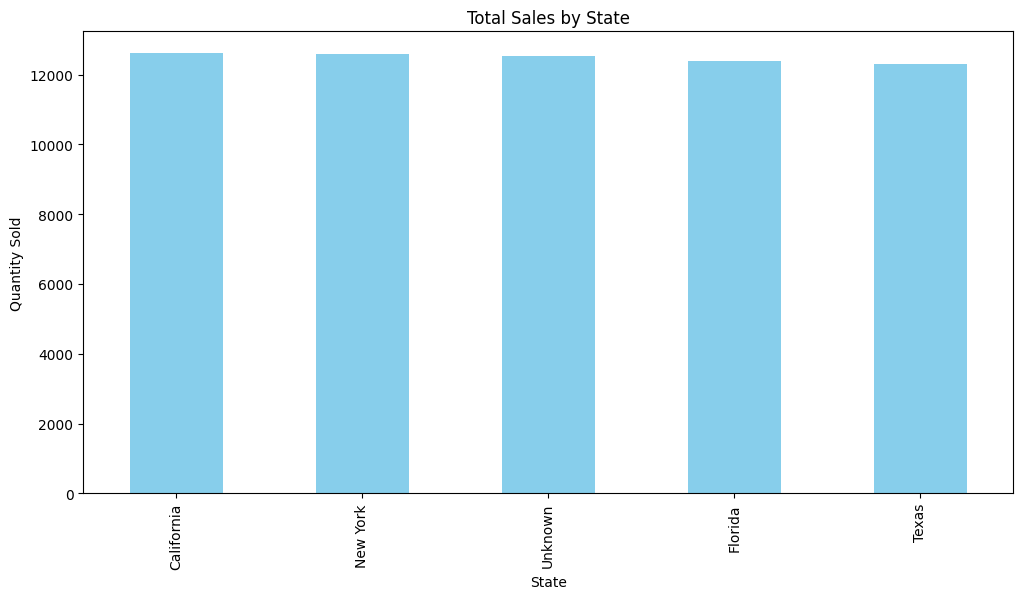

In [ ]:

# Sales by State
state_sales = df.groupby('State')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by State')
plt.ylabel('Quantity Sold')
plt.xlabel('State')
plt.show()


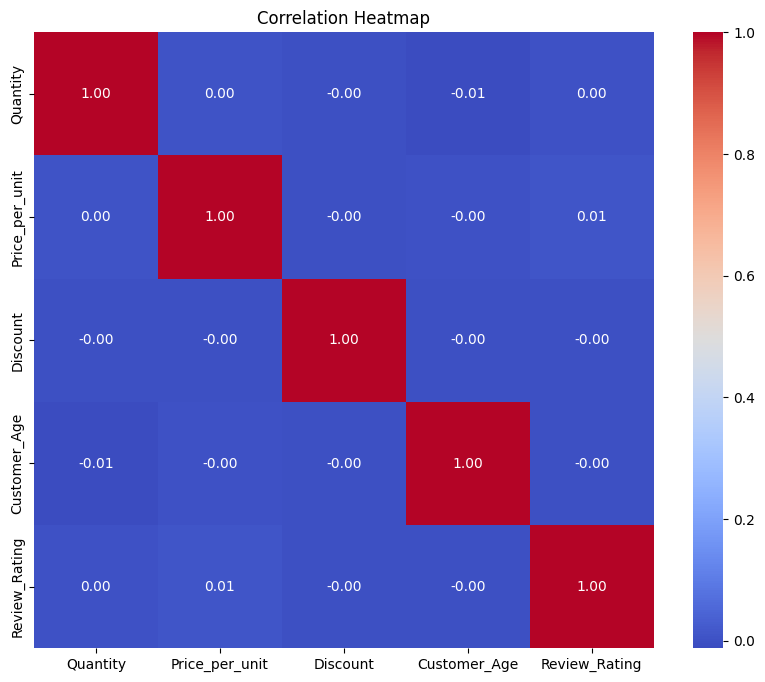

In [ ]:
# Filter numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()


## Save Cleaned Data
The cleaned dataset is saved for future use.

In [ ]:

# Save the cleaned dataset
cleaned_file_path = 'Cleaned_US_Retail_Data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to Cleaned_US_Retail_Data.csv
